In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3 as sql 
import folium
 
%matplotlib inline 

In [2]:
building_permits = pd.read_csv ('../data/building_permits_issued.csv', low_memory = False)
building_permits.head(5)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,W/S HILLSBORO PK. & N/S ABBOTT MARTIN RD.,"BATTINO CONTRACTING SOLUTIONS, LLC",CACR,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017009328,Building Use & Occupancy,"Accessory Structure, Pools",062020B17400CO,02/08/2017,02/08/2017,8000.0,3076 DELTA QUEEN DR,NASHVILLE,TN,37214,LOT 91 ABBINGTON PARK PH1 SEC 4,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAUO,CAA14U016,3318756,to install an oval in ground swimming pool wit...,15.0,37015300.0,"3076 DELTA QUEEN DR\nNASHVILLE, TN 37214\n(36...."


In [3]:
building_permits.tail(7)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
34499,2017062064,Building Residential - Addition,Single Family Residence,07209025900,09/25/2017,09/25/2017,57452.0,1001 FAIRWIN AVE,NASHVILLE,TN,37216,LOT 21 ESKRIDGE SUB,DOTSON GROUP LLC,CARA,CAA01R301,3408732,to construct 510SF addition to the rear of exi...,5.0,37011400.0,"1001 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.199..."
34500,2017080442,Building Residential - Addition,Single Family Residence,13004005000,12/18/2017,01/08/2018,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,PT LOT 4 BELLEMEADE ANNEX,VAN MOL RESTORATION LLC,CARA,CAA01R301,3433097,Remodel Kitchen. Open back wall of home to add...,34.0,37017902.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397..."
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,PT LOT 2 ROLLING ACRES,"ALFORD BUILDERS, LLC",CARA,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34502,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,LOT 25 BLK C CRITTENDEN EST,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34503,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,LOTS 18 19 PT 20 BLK A EDENWOLD CITY SUB,sergy motorny,CACR,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34504,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,PT LOT 15 ORIGINAL TOWN OF NASHVILLE,GENERAL SIGN SERVICES,CASN,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."
34505,2018059022,Building Residential - New,Single Family Residence,163020C32000CO,09/17/2018,09/26/2018,140813.0,1382 RURAL HILL RD 320,ANTIOCH,TN,37013,UNIT 320 AUTUMN RIDGE TOWNHOMES 3RD AMEND,R J YORK HOMES LLC,CARN,CAA01R301,3560019,TO CONSTRUCT A NEW SINGLE FAMILY UNIT AT 1250 ...,32.0,37015628.0,"1382 RURAL HILL RD 320\nANTIOCH, TN 37013\n(36..."


In [4]:
building_permits.shape

(34506, 20)

In [5]:
building_permits = building_permits.drop(columns = ['Subdivision / Lot','Permit Type','Permit Subtype','IVR Tracking #','Census Tract'])

In [6]:
building_permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Contact', 'Purpose', 'Council District',
       'Mapped Location'],
      dtype='object')

In [7]:
building_permits = building_permits.rename(columns = {'Permit #': 'permit_num', 'Permit Type Description': 'type_desc', 'Permit Subtype Description': 'subtype_desc',
           'Parcel': 'parcel', 'Date Entered': 'date_entered',  
            'Date Issued': 'date_issued', 'Construction Cost': 'cost', 'Address': 'address','City':'city','State':'state','ZIP':'zipcode','Contact':'contact','Purpose':'purpose','Council District':'council_district','Mapped Location':'mapped_location'})

In [8]:
building_permits

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017009328,Building Use & Occupancy,"Accessory Structure, Pools",062020B17400CO,02/08/2017,02/08/2017,8000.0,3076 DELTA QUEEN DR,NASHVILLE,TN,37214,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,to install an oval in ground swimming pool wit...,15.0,"3076 DELTA QUEEN DR\nNASHVILLE, TN 37214\n(36...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,"ALFORD BUILDERS, LLC",to construct 2 story addition which will add 1...,6.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34502,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34503,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,sergy motorny,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34504,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,GENERAL SIGN SERVICES,to erect 28SF illuminated wall sign for Famous...,19.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."


In [9]:
building_permits.contact.value_counts()
#615

SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    3037
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      752
OLE SOUTH PROPERTIES INC                                    615
NVR, INC. T/A RYAN HOMES                                    589
JOSLIN SIGN & MAINTENANCE CO INC                            514
                                                           ... 
WATSON, MARK E. ET UX                                         1
Alexandria Adler                                              1
SUN, SIM & MOM SO                                             1
taylor sorrell                                                1
DEERWOOD SERVICES, LLC                                        1
Name: contact, Length: 4549, dtype: int64

In [10]:
building_permits.type_desc.value_counts()

Building Residential - New                  13074
Building Commercial - Rehab                  3463
Building Residential - Rehab                 3357
Building Residential - Addition              3288
Building Demolition Permit                   2899
Building Sign Permit                         2475
Building Use & Occupancy                     1594
Building Commercial - Tenant Finish Out      1060
Building Commercial - New                     998
Building Tree Removal Permit                  476
Building Commercial - Addition                428
Building Commercial - Roofing / Siding        254
Building Residential - Roofing / Siding       241
Building Commercial - Shell                   155
Building Residential - Tenant Finish Out      143
Building Blasting Permit                      136
Building Commercial - Foundation              110
Building Residential - Fire Damage             95
Building Residential - Change Contractor       94
Building Commercial - Fire Damage              54


In [11]:
#can also combine value counts and reset index and auto converts to dataframe

description_counts = building_permits.type_desc.value_counts().reset_index()

In [12]:
description_counts.head(5)

,index,type_desc
0,Building Residential - New,13074
1,Building Commercial - Rehab,3463
2,Building Residential - Rehab,3357
3,Building Residential - Addition,3288
4,Building Demolition Permit,2899


In [13]:
type(description_counts)

pandas.core.frame.DataFrame

In [14]:
description_counts.columns = ['type_desc', 'type_desc_count']

In [15]:
description_counts.columns

Index(['type_desc', 'type_desc_count'], dtype='object')

In [16]:
description_counts.head(5)

,type_desc,type_desc_count
0,Building Residential - New,13074
1,Building Commercial - Rehab,3463
2,Building Residential - Rehab,3357
3,Building Residential - Addition,3288
4,Building Demolition Permit,2899


In [17]:
description_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
type_desc          29 non-null object
type_desc_count    29 non-null int64
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [18]:
description_counts.describe()

,type_desc_count
count,29.000000
mean,1189.862069
std,2561.846275
min,1.000000
25%,26.000000
50%,143.000000
75%,1060.000000
max,13074.000000


In [19]:
description_counts[description_counts['type_desc'].str.contains('Commercial')]

,type_desc,type_desc_count
1,Building Commercial - Rehab,3463
7,Building Commercial - Tenant Finish Out,1060
8,Building Commercial - New,998
10,Building Commercial - Addition,428
11,Building Commercial - Roofing / Siding,254
13,Building Commercial - Shell,155
16,Building Commercial - Foundation,110
19,Building Commercial - Fire Damage,54
21,Building Commercial - Structural Frame,26
26,Building Commercial - Change Contractor,7


In [20]:
## subset description_counts by searching the 'type_desc' column for the string 'residential'

residential_permits = description_counts[description_counts['type_desc'].str.contains('Residential')]

## use the inbuilt sum function to sum the type_desc_count column on subset df

sum(residential_permits['type_desc_count'])

20354

In [21]:
residential_permits = description_counts[description_counts['type_desc'].str.contains('Commercial')]

sum(residential_permits['type_desc_count'])

6556

In [22]:
residential_permits = description_counts[~description_counts['type_desc'].str.contains('Residential|Commercial')]

sum(residential_permits['type_desc_count'])

7596

In [23]:
##verifying that the sum of each subet equals the sum of the original dataframe -- no data was lost when subsets were created

20354 + 6556 + 7596 == sum(description_counts['type_desc_count'])

True

In [24]:
building_permits['date_entered'] = pd.to_datetime(building_permits['date_entered'], yearfirst = True)

In [25]:
building_permits.date_entered

0       2019-11-01
1       2019-02-25
2       2019-02-27
3       2019-07-03
4       2017-02-08
           ...    
34501   2018-10-16
34502   2017-03-22
34503   2018-02-13
34504   2017-07-10
34505   2018-09-17
Name: date_entered, Length: 34506, dtype: datetime64[ns]

In [26]:
building_permits['date_issued'] = pd.to_datetime(building_permits['date_issued'], yearfirst = True)

In [27]:
building_permits.date_issued

0       2019-11-01
1       2019-07-22
2       2019-07-22
3       2019-07-22
4       2017-02-08
           ...    
34501   2018-10-30
34502   2017-03-22
34503   2018-04-17
34504   2017-08-23
34505   2018-09-26
Name: date_issued, Length: 34506, dtype: datetime64[ns]

In [28]:
## split the date string on the '/' and assign the first (element 0) to our new 'month_entered' column

building_permits['month_entered'] = building_permits['date_entered'].dt.month

In [29]:
##building_permits['month_entered'] = building_permits['date_entered'].str.split('/').str[0]

In [30]:
building_permits

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,2019-11-01,2019-11-01,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",11
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115",2
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,2019-07-03,2019-07-22,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",7
4,2017009328,Building Use & Occupancy,"Accessory Structure, Pools",062020B17400CO,2017-02-08,2017-02-08,8000.0,3076 DELTA QUEEN DR,NASHVILLE,TN,37214,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,to install an oval in ground swimming pool wit...,15.0,"3076 DELTA QUEEN DR\nNASHVILLE, TN 37214\n(36....",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,2018-10-16,2018-10-30,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,"ALFORD BUILDERS, LLC",to construct 2 story addition which will add 1...,6.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18...",10
34502,2017019524,Building Residential - Addition,Single Family Residence,04313027400,2017-03-22,2017-03-22,20000.0,316 CHERRY ST,MADISON,TN,37115,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ...",3
34503,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,2018-02-13,2018-04-17,14000.0,131 EDENWOLD RD,MADISON,TN,37115,sergy motorny,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001...",2
34504,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,2017-07-10,2017-08-23,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,GENERAL SIGN SERVICES,to erect 28SF illuminated wall sign for Famous...,19.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296...",7


In [31]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34506 entries, 0 to 34505
Data columns (total 16 columns):
permit_num          34506 non-null object
type_desc           34506 non-null object
subtype_desc        34506 non-null object
parcel              34506 non-null object
date_entered        34506 non-null datetime64[ns]
date_issued         34506 non-null datetime64[ns]
cost                34493 non-null float64
address             34506 non-null object
city                34505 non-null object
state               34505 non-null object
zipcode             34506 non-null int64
contact             34505 non-null object
purpose             34055 non-null object
council_district    34455 non-null float64
mapped_location     34506 non-null object
month_entered       34506 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memory usage: 4.2+ MB


In [32]:
##find the value counts of the 'month_entered', then reset the index to convert a pandas

month_count = building_permits['month_entered'].value_counts().reset_index() 

## rename the columns to better reflect the values that they contain

month_count.columns = ['month_of_year','permit_counts']

In [33]:
month_count

,month_of_year,permit_counts
0,8,3350
1,5,3315
2,6,3284
3,3,3149
4,7,2955
5,10,2909
6,4,2807
7,9,2784
8,1,2760
9,2,2674


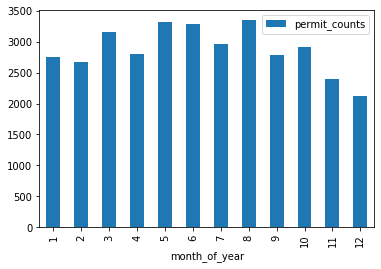

In [34]:
## sorting the 'Month_of_Year' column, using the default (ascending = True)

month_count = month_count.sort_values('month_of_year')

## create a bar plot from our month_count data frame, with 'month_of_year' on the x axis and 'permit_counts' on the y axis

ax = month_count.plot.bar(x = 'month_of_year', y = 'permit_counts')

In [35]:
## convert the 'date_entered' and 'date_issued' columns to datetime using pd.to_datetime()

building_permits['date_entered'] = pd.to_datetime(building_permits['date_entered'])
building_permits['date_issued'] = pd.to_datetime(building_permits['date_issued'])

In [36]:
##now that the 'date_entered' and 'date_issued' are in date tiem , we can subtract date issued from date entered to 
##find the amount of days it took to issue a permit

max_permit_time = max((building_permits['date_issued'] - building_permits['date_entered']).dt.days)
min_permit_time = min((building_permits['date_issued'] - building_permits['date_entered']).dt.days)

print(f"The longest time a permit took to be issued was {max_permit_time} days, while the shortest was {min_permit_time} days")


The longest time a permit took to be issued was 3371 days, while the shortest was 0 days


In [37]:
more_than_100 = building_permits[(building_permits['date_issued'] - building_permits['date_entered']).dt.days > 100]

In [38]:
more_than_100

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115",2
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2
17,2019002344,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",09314056400,2019-01-14,2019-07-22,43306369.0,908 DIVISION ST,NASHVILLE,TN,37203,GREYSTAR DEVELOPMENT & CONSTRUCTION LP,Construct 16 story multifamily residential bui...,19.0,"908 DIVISION ST\nNASHVILLE, TN 37203\n(36.1506...",1
52,2019010880,Building Commercial - Rehab,"General Office, Professional Services",09516001800,2019-02-25,2019-07-23,987230.0,2636 ELM HILL PIKE,NASHVILLE,TN,37214,SOLOMON BUILDERS INC,interior reno to 5th floor for THE GENERAL INS...,15.0,"2636 ELM HILL PIKE\nNASHVILLE, TN 37214\n(36.1...",2
65,2018030921,Building Residential - New,Single Family Residence,133050C00200CO,2018-05-30,2019-05-31,126168.0,502 VERITAS ST,NASHVILLE,TN,37211,RLP CONSTRUCTION LLC,"5/31/2019 Sidewalk Fee in the amount of $22,32...",16.0,"502 VERITAS ST\nNASHVILLE, TN 37211\n(36.09786...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34458,201513562,Building Commercial - New,"Automobile Repair, Storage Mod Hazard",03100006800,2015-04-10,2017-11-27,873480.0,7435 OLD HICKORY BLVD,WHITES CREEK,TN,37189,Chet Rhodes 615-480-7535,PERMIT FOR ALREADY EXISTING 60 X 200 BUILDING ...,3.0,"7435 OLD HICKORY BLVD\nWHITES CREEK, TN 37189\...",4
34460,2018060354,Building Commercial - Rehab,"Retail, Department / Retail Stores",07300001700,2018-09-21,2019-01-07,305000.0,433 OPRY MILLS DR,NASHVILLE,TN,37214,LAKEVIEW CONSTRUCTION INC,"interior rehab 3,774 sq.ft. for TMOBILE space ...",15.0,"433 OPRY MILLS DR\nNASHVILLE, TN 37214\n(36.20...",9
34465,2017009136,Building Commercial - Tenant Finish Out,"Medical Office, Professional Services",12800018700,2017-02-07,2017-07-31,218580.0,8131 SAWYER BROWN RD 501,NASHVILLE,TN,37221,MTLC INCORPORATED,to finish out 3000SF of building for dentist o...,22.0,"8131 SAWYER BROWN RD 501\nNASHVILLE, TN 37221\...",2
34489,2017030664,Building Commercial - Shell,"General Office, Professional Services",09301009700,2017-05-09,2017-08-30,34034903.0,500 11TH AVE N,NASHVILLE,TN,37203,Bill Garcia,to construct 10 story shell with attached park...,19.0,"500 11TH AVE N\nNASHVILLE, TN 37203\n(36.16421...",5


In [39]:
more_than_100.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 1 to 34495
Data columns (total 16 columns):
permit_num          2711 non-null object
type_desc           2711 non-null object
subtype_desc        2711 non-null object
parcel              2711 non-null object
date_entered        2711 non-null datetime64[ns]
date_issued         2711 non-null datetime64[ns]
cost                2711 non-null float64
address             2711 non-null object
city                2710 non-null object
state               2710 non-null object
zipcode             2711 non-null int64
contact             2711 non-null object
purpose             2711 non-null object
council_district    2703 non-null float64
mapped_location     2711 non-null object
month_entered       2711 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memory usage: 360.1+ KB


In [40]:
building_permits.date_entered

0       2019-11-01
1       2019-02-25
2       2019-02-27
3       2019-07-03
4       2017-02-08
           ...    
34501   2018-10-16
34502   2017-03-22
34503   2018-02-13
34504   2017-07-10
34505   2018-09-17
Name: date_entered, Length: 34506, dtype: datetime64[ns]

In [41]:
building_permits['years_included'] = building_permits['date_issued'].dt.year

In [42]:
building_permits.years_included.unique()

array([2019, 2017, 2018, 2020], dtype=int64)

In [43]:
##building_permits = building_permits.query ('years_included' == "2019")

In [44]:
building_permits[building_permits.years_included == 2019]

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,2019-11-01,2019-11-01,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",11,2019
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115",2,2019
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2,2019
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,2019-07-03,2019-07-22,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",7,2019
5,2019063190,Building Commercial - New,"Accessory Structure, Garage",09700016400,2019-10-16,2019-12-20,6561.0,3816 DODSON CHAPEL RD 1005,HERMITAGE,TN,37076,BACAR CONSTRUCTORS INC,construct pump house bldg. \ntwo 4 story apt...,14.0,"3816 DODSON CHAPEL RD 1005\nHERMITAGE, TN 3707...",10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,2018060354,Building Commercial - Rehab,"Retail, Department / Retail Stores",07300001700,2018-09-21,2019-01-07,305000.0,433 OPRY MILLS DR,NASHVILLE,TN,37214,LAKEVIEW CONSTRUCTION INC,"interior rehab 3,774 sq.ft. for TMOBILE space ...",15.0,"433 OPRY MILLS DR\nNASHVILLE, TN 37214\n(36.20...",9,2019
34475,2019017929,Building Sign Permit,Sign - Ground / Wall Signs,14800004800,2019-03-27,2019-03-27,11400.0,2101 ANTIOCH PIKE,ANTIOCH,TN,37013,TRI STAR TRANSPORT LLC,to install two (2) fa�ade signs under 15% not ...,28.0,"2101 ANTIOCH PIKE\nANTIOCH, TN 37013\n(36.0685...",3,2019
34490,2019004622,Building Residential - New,Single Family Residence,13301014500,2019-01-24,2019-03-04,232960.0,3218 MEADE AVE,NASHVILLE,TN,37211,SKYVIEW PROPERTY GROUP LLC,to construct a single family residence with 20...,16.0,"3218 MEADE AVE\nNASHVILLE, TN 37211\n(36.10137...",1,2019
34492,2019016337,Building Residential - Rehab,Single Family Residence,08302006400,2019-03-20,2019-03-20,2500.0,1428 GREENWOOD AVE,NASHVILLE,TN,37206,James Barrett,to conduct interior renovations to convert 2nd...,6.0,"1428 GREENWOOD AVE\nNASHVILLE, TN 37206\n(36.1...",3,2019


In [45]:
building_permits_2019 = building_permits[building_permits.years_included == 2019]

In [46]:
building_permits_2019

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,2019-11-01,2019-11-01,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",11,2019
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115",2,2019
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2,2019
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,2019-07-03,2019-07-22,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",7,2019
5,2019063190,Building Commercial - New,"Accessory Structure, Garage",09700016400,2019-10-16,2019-12-20,6561.0,3816 DODSON CHAPEL RD 1005,HERMITAGE,TN,37076,BACAR CONSTRUCTORS INC,construct pump house bldg. \ntwo 4 story apt...,14.0,"3816 DODSON CHAPEL RD 1005\nHERMITAGE, TN 3707...",10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,2018060354,Building Commercial - Rehab,"Retail, Department / Retail Stores",07300001700,2018-09-21,2019-01-07,305000.0,433 OPRY MILLS DR,NASHVILLE,TN,37214,LAKEVIEW CONSTRUCTION INC,"interior rehab 3,774 sq.ft. for TMOBILE space ...",15.0,"433 OPRY MILLS DR\nNASHVILLE, TN 37214\n(36.20...",9,2019
34475,2019017929,Building Sign Permit,Sign - Ground / Wall Signs,14800004800,2019-03-27,2019-03-27,11400.0,2101 ANTIOCH PIKE,ANTIOCH,TN,37013,TRI STAR TRANSPORT LLC,to install two (2) fa�ade signs under 15% not ...,28.0,"2101 ANTIOCH PIKE\nANTIOCH, TN 37013\n(36.0685...",3,2019
34490,2019004622,Building Residential - New,Single Family Residence,13301014500,2019-01-24,2019-03-04,232960.0,3218 MEADE AVE,NASHVILLE,TN,37211,SKYVIEW PROPERTY GROUP LLC,to construct a single family residence with 20...,16.0,"3218 MEADE AVE\nNASHVILLE, TN 37211\n(36.10137...",1,2019
34492,2019016337,Building Residential - Rehab,Single Family Residence,08302006400,2019-03-20,2019-03-20,2500.0,1428 GREENWOOD AVE,NASHVILLE,TN,37206,James Barrett,to conduct interior renovations to convert 2nd...,6.0,"1428 GREENWOOD AVE\nNASHVILLE, TN 37206\n(36.1...",3,2019


In [47]:
type(building_permits_2019)

pandas.core.frame.DataFrame

In [48]:
##using grouby for counting

building_permits_2019_council = building_permits_2019.groupby('council_district')['permit_num'].count().reset_index()

In [49]:
building_permits_2019_council.columns = ['district','count']

In [50]:
building_permits_2019_council

,district,count
0,1.0,177
1,2.0,455
2,3.0,201
3,4.0,203
4,5.0,593
5,6.0,453
6,7.0,387
7,8.0,286
8,9.0,139
9,10.0,108


In [51]:
type(building_permits_2019_council)

pandas.core.frame.DataFrame

In [52]:
#converting district to the astype int to drop the floating decimal - more readable axis

building_permits_2019_council['district'] = building_permits_2019_council['district'].astype(int)

building_permits_2019_council = building_permits_2019_council.sort_values('count')

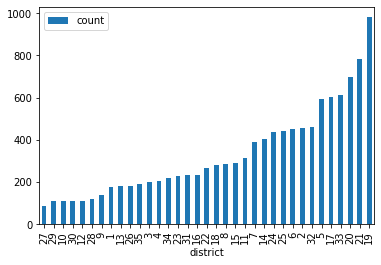

In [53]:
ax = building_permits_2019_council.plot.bar(x = 'district', y = 'count')

In [54]:
strp = pd.read_csv ('../data/Residential_Short_Term_Rental_Permits.csv', low_memory = False)


In [55]:
strp.columns

Index(['Permit #', 'Applicant', 'Applicant Home Phone',
       'Applicant Mobile Phone', 'Applicant Work Phone',
       'Applicant Work Phone Ext.', 'Contact', 'Contact Home Phone',
       'Contact Mobile Phone', 'Contact Work Phone', 'Contact Work Phone Ext.',
       'Permit Subtype Description', 'Permit Status', 'Parcel', 'Date Entered',
       'Date Issued', 'Expiration Date', 'Address', 'City', 'State', 'ZIP',
       'Subdivision / Lot', 'Purpose', 'Permit Owner Name',
       'Permit Owner Addr. 1', 'Permit Owner Addr. 2', 'Permit Owner Addr. 3',
       'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP',
       'Permit Type', 'Permit Subtype', 'Council District', 'Census Tract',
       'Mapped Location'],
      dtype='object')

In [56]:
strp = strp.drop(columns = ['Applicant Home Phone' , 'Applicant Mobile Phone' , 'Applicant Work Phone' , 'Applicant Work Phone Ext.' , 'Contact Home Phone' , 'Contact Mobile Phone' , 'Contact Work Phone' , 'Contact Work Phone Ext.' , 'Subdivision / Lot' , 'Permit Owner Addr. 1' , 'Permit Owner Addr. 2' , 'Permit Owner Addr. 3' , 'Permit Owner City' , 'Permit Owner State' , 'Permit Owner ZIP' , 'Permit Subtype' , 'Census Tract'])

In [57]:
strp.columns

Index(['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description',
       'Permit Status', 'Parcel', 'Date Entered', 'Date Issued',
       'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Purpose',
       'Permit Owner Name', 'Permit Type', 'Council District',
       'Mapped Location'],
      dtype='object')

In [58]:
strp.columns = ['id' , 'applicant' , 'contact' , 'subtype_desc' , 'status' , 'parcel' , 'entered' , 'issued' , 'expiration' , 'address' , 'city' , 'state' , 'zip_code' , 'purpose' , 'permit_owner_name' , 'permit_type' , 'council_district' , 'mapped_location']

In [59]:
strp.columns

Index(['id', 'applicant', 'contact', 'subtype_desc', 'status', 'parcel',
       'entered', 'issued', 'expiration', 'address', 'city', 'state',
       'zip_code', 'purpose', 'permit_owner_name', 'permit_type',
       'council_district', 'mapped_location'],
      dtype='object')

In [60]:
strp['issued'] = pd.to_datetime(strp['issued'], yearfirst = True)

In [61]:
strp['year_issued'] = strp['issued'].dt.year

In [62]:
strp[strp.year_issued == 2019]

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,city,state,zip_code,purpose,permit_owner_name,permit_type,council_district,mapped_location,year_issued
0,2019004616,Carson Padgett,Carson Padgett,Short Term Rental � Multifamily,ISSUED,104020U00100CO,01/24/2019 12:00:00 AM,2019-02-25,02/25/2021 12:00:00 AM,3134 LONG BLVD 103,NASHVILLE,TN,37203,By making this application for Short Term Rent...,"PADGETT, CARSON",CASR,21.0,"3134 LONG BLVD 103\nNASHVILLE, TN 37203\n(36.1...",2019.0
7,2019070627,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 403,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 403\nNASHVILLE, TN 37203\n(36...",2019.0
10,2019070585,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 301,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 301\nNASHVILLE, TN 37203\n(36...",2019.0
29,2019070595,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01300CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 305,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 305\nNASHVILLE, TN 37203\n(36...",2019.0
37,2019070646,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02100CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 404,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 404\nNASHVILLE, TN 37203\n(36...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,2019014142,Melanie Gowdt,Brittani White,Short Term Rental � Multifamily,ISSUED,07113000200,03/11/2019 12:00:00 AM,2019-04-12,04/12/2020 12:00:00 AM,281 CUMBERLAND BND 147,NASHVILLE,TN,37228,By making this application for Short Term Rent...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 147\nNASHVILLE, TN 37228\n(...",2019.0
9699,2019027849,Arash Shoushtari,Arash Shoushtari,Short Term Rental - Owner Occupied,ISSUED,06115016500,05/13/2019 12:00:00 AM,2019-06-05,06/05/2020 12:00:00 AM,1104B SUNNYMEADE DR,NASHVILLE,TN,37216,STRP permit is for upper level (1104B) of dupl...,"SHOUSHTARI, ARASH & GREENE, CARA ANNE",CASR,7.0,"1104B SUNNYMEADE DR\nNASHVILLE, TN 37216\n(36....",2019.0
9700,2019058300,The Duke Nashville,"Sta Here, LLC",Short Term Rental � Multifamily,ISSUED,07113000200,09/24/2019 12:00:00 AM,2019-10-08,10/08/2020 12:00:00 AM,281 CUMBERLAND BND 461,NASHVILLE,TN,37228,By making this application for a Residential S...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 461\nNASHVILLE, TN 37228\n(...",2019.0
9701,2019019149,James Mitchell,Marisol Alicea,Short Term Rental - Owner Occupied,ISSUED,14604002800,04/02/2019 12:00:00 AM,2019-04-10,04/10/2020 12:00:00 AM,4704 TROUSDALE DR,NASHVILLE,TN,37220,By making this application for a Residential S...,"MITCHELL, JAMES P.",CASR,26.0,"4704 TROUSDALE DR\nNASHVILLE, TN 37220\n(36.08...",2019.0


In [63]:
strp_2019 = strp[strp.year_issued == 2019]

In [64]:
strp_2019

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,city,state,zip_code,purpose,permit_owner_name,permit_type,council_district,mapped_location,year_issued
0,2019004616,Carson Padgett,Carson Padgett,Short Term Rental � Multifamily,ISSUED,104020U00100CO,01/24/2019 12:00:00 AM,2019-02-25,02/25/2021 12:00:00 AM,3134 LONG BLVD 103,NASHVILLE,TN,37203,By making this application for Short Term Rent...,"PADGETT, CARSON",CASR,21.0,"3134 LONG BLVD 103\nNASHVILLE, TN 37203\n(36.1...",2019.0
7,2019070627,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 403,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 403\nNASHVILLE, TN 37203\n(36...",2019.0
10,2019070585,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 301,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 301\nNASHVILLE, TN 37203\n(36...",2019.0
29,2019070595,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01300CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 305,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 305\nNASHVILLE, TN 37203\n(36...",2019.0
37,2019070646,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02100CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 404,NASHVILLE,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 404\nNASHVILLE, TN 37203\n(36...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,2019014142,Melanie Gowdt,Brittani White,Short Term Rental � Multifamily,ISSUED,07113000200,03/11/2019 12:00:00 AM,2019-04-12,04/12/2020 12:00:00 AM,281 CUMBERLAND BND 147,NASHVILLE,TN,37228,By making this application for Short Term Rent...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 147\nNASHVILLE, TN 37228\n(...",2019.0
9699,2019027849,Arash Shoushtari,Arash Shoushtari,Short Term Rental - Owner Occupied,ISSUED,06115016500,05/13/2019 12:00:00 AM,2019-06-05,06/05/2020 12:00:00 AM,1104B SUNNYMEADE DR,NASHVILLE,TN,37216,STRP permit is for upper level (1104B) of dupl...,"SHOUSHTARI, ARASH & GREENE, CARA ANNE",CASR,7.0,"1104B SUNNYMEADE DR\nNASHVILLE, TN 37216\n(36....",2019.0
9700,2019058300,The Duke Nashville,"Sta Here, LLC",Short Term Rental � Multifamily,ISSUED,07113000200,09/24/2019 12:00:00 AM,2019-10-08,10/08/2020 12:00:00 AM,281 CUMBERLAND BND 461,NASHVILLE,TN,37228,By making this application for a Residential S...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 461\nNASHVILLE, TN 37228\n(...",2019.0
9701,2019019149,James Mitchell,Marisol Alicea,Short Term Rental - Owner Occupied,ISSUED,14604002800,04/02/2019 12:00:00 AM,2019-04-10,04/10/2020 12:00:00 AM,4704 TROUSDALE DR,NASHVILLE,TN,37220,By making this application for a Residential S...,"MITCHELL, JAMES P.",CASR,26.0,"4704 TROUSDALE DR\nNASHVILLE, TN 37220\n(36.08...",2019.0


In [65]:
strp_2019_council = strp_2019.groupby('council_district')['issued'].count().reset_index()

In [66]:
strp_2019_council

,council_district,issued
0,1.0,17
1,2.0,126
2,3.0,19
3,4.0,8
4,5.0,229
5,6.0,113
6,7.0,73
7,8.0,56
8,9.0,8
9,10.0,4


In [67]:
building_permits_2019_council['permit_type'] = 'building'

In [68]:
building_permits_2019_council

,district,count,permit_type
26,27,87,building
28,29,108,building
9,10,108,building
29,30,109,building
11,12,110,building
27,28,118,building
8,9,139,building
0,1,177,building
12,13,180,building
25,26,181,building


In [69]:
strp_2019_council['permit_type'] = 'short_term_rental'

In [70]:
strp_2019_council

,council_district,issued,permit_type
0,1.0,17,short_term_rental
1,2.0,126,short_term_rental
2,3.0,19,short_term_rental
3,4.0,8,short_term_rental
4,5.0,229,short_term_rental
5,6.0,113,short_term_rental
6,7.0,73,short_term_rental
7,8.0,56,short_term_rental
8,9.0,8,short_term_rental
9,10.0,4,short_term_rental


In [71]:
strp_2019_council.columns = ['district','count','permit_type']

In [72]:
strp_2019_council

,district,count,permit_type
0,1.0,17,short_term_rental
1,2.0,126,short_term_rental
2,3.0,19,short_term_rental
3,4.0,8,short_term_rental
4,5.0,229,short_term_rental
5,6.0,113,short_term_rental
6,7.0,73,short_term_rental
7,8.0,56,short_term_rental
8,9.0,8,short_term_rental
9,10.0,4,short_term_rental


In [73]:
concat_buildstrp = pd.concat([building_permits_2019_council, strp_2019_council])
concat_buildstrp.head()

,district,count,permit_type
26,27.0,87,building
28,29.0,108,building
9,10.0,108,building
29,30.0,109,building
11,12.0,110,building


In [74]:
concat_buildstrp = concat_buildstrp.reset_index(drop = True)

In [75]:
concat_buildstrp

,district,count,permit_type
0,27.0,87,building
1,29.0,108,building
2,10.0,108,building
3,30.0,109,building
4,12.0,110,building
...,...,...,...
65,31.0,4,short_term_rental
66,32.0,1,short_term_rental
67,33.0,3,short_term_rental
68,34.0,3,short_term_rental


<Figure size 720x576 with 0 Axes>

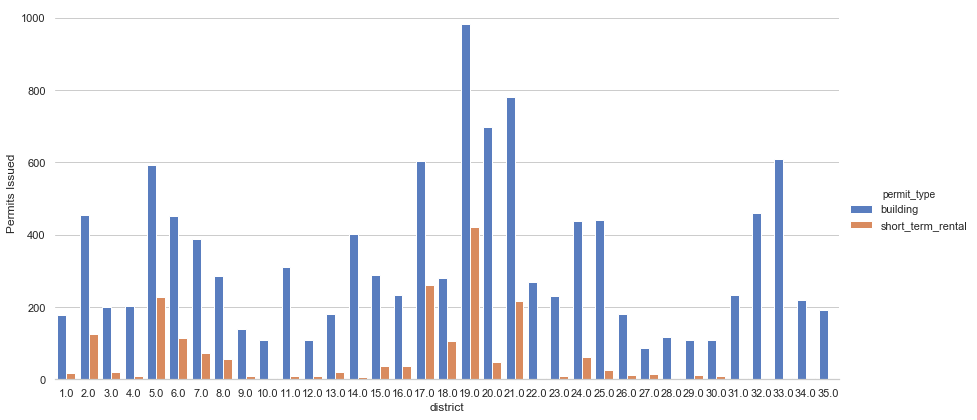

In [76]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")

# Draw a nested barplot 
barplot_permits_2019 = sns.catplot(x="district", y="count", hue="permit_type", data=concat_buildstrp,
                height=6, aspect = 2, kind="bar", palette="muted")
barplot_permits_2019.despine(left=True)
barplot_permits_2019.set_ylabels("Permits Issued")

In [77]:
db = "../data/stations.db" 
con = sql.connect(db) 
mycursor = con.cursor()  
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;") 
tables = mycursor.fetchall() 
print(tables) 

[('fire_stations',)]


In [78]:
fire_stations = pd.read_sql("SELECT * FROM fire_stations;", con)

In [79]:
type(fire_stations)

pandas.core.frame.DataFrame

In [80]:
fire_stations.shape

(38, 7)

In [81]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 15)

In [82]:
nash_map

In [83]:
  def add_lat_lng(df): 
        lat_lng = pd.DataFrame(df['mapped_location'].apply(lambda s: s[s.find("(")+1:s.find(")")].split(', ')))
        lat_lng_df = lat_lng['mapped_location'].apply(pd.Series)  
        lat_lng_df.columns = ['lat', 'lng']  
        df = pd.concat([df, lat_lng_df], axis = 1)  
        return df 

In [84]:
building_permits_2019 = add_lat_lng(building_permits_2019)

In [85]:
building_permits_2019 

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included,lat,lng
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,2019-11-01,2019-11-01,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",11,2019,36.228473,-86.740798
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115",2,2019,812 BRIAR CIR\nMADISON,TN 3711
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2,2019,36.108463,-86.814234
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,2019-07-03,2019-07-22,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",7,2019,4327 STONE HALL BLVD\nHERMITAGE,TN 3707
5,2019063190,Building Commercial - New,"Accessory Structure, Garage",09700016400,2019-10-16,2019-12-20,6561.0,3816 DODSON CHAPEL RD 1005,HERMITAGE,TN,37076,BACAR CONSTRUCTORS INC,construct pump house bldg. \ntwo 4 story apt...,14.0,"3816 DODSON CHAPEL RD 1005\nHERMITAGE, TN 3707...",10,2019,36.165208,-86.614768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,2018060354,Building Commercial - Rehab,"Retail, Department / Retail Stores",07300001700,2018-09-21,2019-01-07,305000.0,433 OPRY MILLS DR,NASHVILLE,TN,37214,LAKEVIEW CONSTRUCTION INC,"interior rehab 3,774 sq.ft. for TMOBILE space ...",15.0,"433 OPRY MILLS DR\nNASHVILLE, TN 37214\n(36.20...",9,2019,36.202913,-86.694719
34475,2019017929,Building Sign Permit,Sign - Ground / Wall Signs,14800004800,2019-03-27,2019-03-27,11400.0,2101 ANTIOCH PIKE,ANTIOCH,TN,37013,TRI STAR TRANSPORT LLC,to install two (2) fa�ade signs under 15% not ...,28.0,"2101 ANTIOCH PIKE\nANTIOCH, TN 37013\n(36.0685...",3,2019,36.068567,-86.683414
34490,2019004622,Building Residential - New,Single Family Residence,13301014500,2019-01-24,2019-03-04,232960.0,3218 MEADE AVE,NASHVILLE,TN,37211,SKYVIEW PROPERTY GROUP LLC,to construct a single family residence with 20...,16.0,"3218 MEADE AVE\nNASHVILLE, TN 37211\n(36.10137...",1,2019,36.101379,-86.745528
34492,2019016337,Building Residential - Rehab,Single Family Residence,08302006400,2019-03-20,2019-03-20,2500.0,1428 GREENWOOD AVE,NASHVILLE,TN,37206,James Barrett,to conduct interior renovations to convert 2nd...,6.0,"1428 GREENWOOD AVE\nNASHVILLE, TN 37206\n(36.1...",3,2019,36.189719,-86.739611


In [86]:
strp_2019 = add_lat_lng(strp_2019)

In [87]:
strp_2019

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,...,state,zip_code,purpose,permit_owner_name,permit_type,council_district,mapped_location,year_issued,lat,lng
0,2019004616,Carson Padgett,Carson Padgett,Short Term Rental � Multifamily,ISSUED,104020U00100CO,01/24/2019 12:00:00 AM,2019-02-25,02/25/2021 12:00:00 AM,3134 LONG BLVD 103,...,TN,37203,By making this application for Short Term Rent...,"PADGETT, CARSON",CASR,21.0,"3134 LONG BLVD 103\nNASHVILLE, TN 37203\n(36.1...",2019.0,36.145684,-86.819414
7,2019070627,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 403,...,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 403\nNASHVILLE, TN 37203\n(36...",2019.0,36.150955,-86.783129
10,2019070585,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01000CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 301,...,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 301\nNASHVILLE, TN 37203\n(36...",2019.0,36.150955,-86.783129
29,2019070595,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A01300CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 305,...,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 305\nNASHVILLE, TN 37203\n(36...",2019.0,36.150955,-86.783129
37,2019070646,The Mainland Companies,"Stay Alfred, Inc.",Short Term Rental � Multifamily,ISSUED,093132A02100CO,11/18/2019 12:00:00 AM,2019-11-20,11/20/2020 12:00:00 AM,1002 DIVISION ST 404,...,TN,37203,By making this application for a Residential S...,"1000 DIVISION STREET, LLC",CASR,19.0,"1002 DIVISION ST 404\nNASHVILLE, TN 37203\n(36...",2019.0,36.150955,-86.783129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,2019014142,Melanie Gowdt,Brittani White,Short Term Rental � Multifamily,ISSUED,07113000200,03/11/2019 12:00:00 AM,2019-04-12,04/12/2020 12:00:00 AM,281 CUMBERLAND BND 147,...,TN,37228,By making this application for Short Term Rent...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 147\nNASHVILLE, TN 37228\n(...",2019.0,36.194925,-86.789663
9699,2019027849,Arash Shoushtari,Arash Shoushtari,Short Term Rental - Owner Occupied,ISSUED,06115016500,05/13/2019 12:00:00 AM,2019-06-05,06/05/2020 12:00:00 AM,1104B SUNNYMEADE DR,...,TN,37216,STRP permit is for upper level (1104B) of dupl...,"SHOUSHTARI, ARASH & GREENE, CARA ANNE",CASR,7.0,"1104B SUNNYMEADE DR\nNASHVILLE, TN 37216\n(36....",2019.0,36.218293,-86.72689
9700,2019058300,The Duke Nashville,"Sta Here, LLC",Short Term Rental � Multifamily,ISSUED,07113000200,09/24/2019 12:00:00 AM,2019-10-08,10/08/2020 12:00:00 AM,281 CUMBERLAND BND 461,...,TN,37228,By making this application for a Residential S...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 461\nNASHVILLE, TN 37228\n(...",2019.0,36.194925,-86.789663
9701,2019019149,James Mitchell,Marisol Alicea,Short Term Rental - Owner Occupied,ISSUED,14604002800,04/02/2019 12:00:00 AM,2019-04-10,04/10/2020 12:00:00 AM,4704 TROUSDALE DR,...,TN,37220,By making this application for a Residential S...,"MITCHELL, JAMES P.",CASR,26.0,"4704 TROUSDALE DR\nNASHVILLE, TN 37220\n(36.08...",2019.0,36.080179,-86.758487


In [177]:
building_permits_2019= building_permits_2019[(building_permits_2019['type_desc'].str.contains('Residential - New')) & (building_permits_2019['subtype_desc'].str.contains('Multifamily'))]

In [178]:
building_permits_2019

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included,lat,lng
151,2019043552,Building Residential - New,"Multifamily, Townhome",071140L00600CO,2019-07-23,2019-07-23,230012.0,97 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 2018049590. has...,2.0,"97 FERN AVE\nNASHVILLE, TN 37207\n(36.196011, ...",7,2019,36.196011,-86.77862
158,2019043546,Building Residential - New,"Multifamily, Townhome",071140L00500CO,2019-07-23,2019-07-23,230012.0,95 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,this permit to complete work started under 201...,2.0,"95 FERN AVE\nNASHVILLE, TN 37207\n(36.195998, ...",7,2019,36.195998,-86.778526
202,2019043557,Building Residential - New,"Multifamily, Townhome",071140L00800CO,2019-07-23,2019-07-23,230012.0,101 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 2018049595. has...,2.0,"101 FERN AVE\nNASHVILLE, TN 37207\n(36.195944,...",7,2019,36.195944,-86.778193
207,2019043556,Building Residential - New,"Multifamily, Townhome",071140L00700CO,2019-07-23,2019-07-23,230012.0,99 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 20180049592. ha...,2.0,"99 FERN AVE\nNASHVILLE, TN 37207\n(36.196025, ...",7,2019,36.196025,-86.778714
272,2019056862,Building Residential - New,"Multifamily, Townhome",050020A26400CO,2019-09-18,2019-09-19,137433.0,1279 HAVENBROOK DR,NASHVILLE,TN,37207,"NVR, INC. T/A RYAN HOMES","per master permit 2018079265, to construct a t...",3.0,"1279 HAVENBROOK DR\nNASHVILLE, TN 37207",9,2019,1279 HAVENBROOK DR\nNASHVILLE,TN 3720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32806,2019007178,Building Residential - New,"Multifamily, Townhome",164140A04700CO,2019-02-05,2019-02-20,184633.0,5055 MOUNTAIN SPRINGS RD,ANTIOCH,TN,37013,"E SQUARED,LLC","per master permit 2018018696, to construct a t...",32.0,"5055 MOUNTAIN SPRINGS RD\nANTIOCH, TN 37013\n(...",2,2019,36.044836,-86.60988
32866,2019007174,Building Residential - New,"Multifamily, Townhome",164140A04600CO,2019-02-05,2019-02-20,249407.0,5053 MOUNTAIN SPRINGS RD,ANTIOCH,TN,37013,"E SQUARED,LLC","per master permit 2018018696, to construct a t...",32.0,"5053 MOUNTAIN SPRINGS RD\nANTIOCH, TN 37013\n(...",2,2019,36.044845,-86.609849
32975,2019023250,Building Residential - New,"Multifamily, Townhome",163160C30500CO,2019-04-22,2019-04-22,136307.0,1123 WATERBURG LN,ANTIOCH,TN,37013,"JONES CONSTRUCTION, DWAYNE MARK JONES DBA","per master permit 2017045825, to construct a t...",32.0,"1123 WATERBURG LN\nANTIOCH, TN 37013\n(36.0416...",4,2019,36.041601,-86.629998
33508,2019008647,Building Residential - New,"Multifamily, Condominium 3&4 Unit Bldg",163160D02800CO,2019-02-12,2019-02-21,195000.0,5905 MONROE XING,ANTIOCH,TN,37013,LAKE FOREST HOMES INC,Under Master Permit #2018042415: 2 Story townh...,32.0,"5905 MONROE XING\nANTIOCH, TN 37013\n(36.03994...",2,2019,36.039941,-86.628433


In [179]:
building_permits_2019.drop_duplicates('lat')
building_permits_2019.drop_duplicates('lng')

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included,lat,lng
151,2019043552,Building Residential - New,"Multifamily, Townhome",071140L00600CO,2019-07-23,2019-07-23,230012.0,97 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 2018049590. has...,2.0,"97 FERN AVE\nNASHVILLE, TN 37207\n(36.196011, ...",7,2019,36.196011,-86.77862
158,2019043546,Building Residential - New,"Multifamily, Townhome",071140L00500CO,2019-07-23,2019-07-23,230012.0,95 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,this permit to complete work started under 201...,2.0,"95 FERN AVE\nNASHVILLE, TN 37207\n(36.195998, ...",7,2019,36.195998,-86.778526
202,2019043557,Building Residential - New,"Multifamily, Townhome",071140L00800CO,2019-07-23,2019-07-23,230012.0,101 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 2018049595. has...,2.0,"101 FERN AVE\nNASHVILLE, TN 37207\n(36.195944,...",7,2019,36.195944,-86.778193
207,2019043556,Building Residential - New,"Multifamily, Townhome",071140L00700CO,2019-07-23,2019-07-23,230012.0,99 FERN AVE,NASHVILLE,TN,37207,GRAHAM CONSTRUCTION OF TENNESSEE LLC,to complete work started under 20180049592. ha...,2.0,"99 FERN AVE\nNASHVILLE, TN 37207\n(36.196025, ...",7,2019,36.196025,-86.778714
272,2019056862,Building Residential - New,"Multifamily, Townhome",050020A26400CO,2019-09-18,2019-09-19,137433.0,1279 HAVENBROOK DR,NASHVILLE,TN,37207,"NVR, INC. T/A RYAN HOMES","per master permit 2018079265, to construct a t...",3.0,"1279 HAVENBROOK DR\nNASHVILLE, TN 37207",9,2019,1279 HAVENBROOK DR\nNASHVILLE,TN 3720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31762,2019008640,Building Residential - New,"Multifamily, Condominium 3&4 Unit Bldg",163160D02500CO,2019-02-12,2019-02-21,195000.0,5900 MONROE XING,ANTIOCH,TN,37013,LAKE FOREST HOMES INC,Under Master Permit #2018042415: 2 Story townh...,32.0,"5900 MONROE XING\nANTIOCH, TN 37013\n(36.03986...",2,2019,36.039868,-86.62847
32405,2019010111,Building Residential - New,"Multifamily, Townhome",163020B12800CO,2019-02-20,2019-03-06,157034.0,624 PIPPIN DR,ANTIOCH,TN,37013,"BATES, DANIEL ELI",PERMIT TO CONSTRUCT � �NEW SINGLE FAMILY RESID...,28.0,"624 PIPPIN DR\nANTIOCH, TN 37013\n(36.061035, ...",2,2019,36.061035,-86.650587
32866,2019007174,Building Residential - New,"Multifamily, Townhome",164140A04600CO,2019-02-05,2019-02-20,249407.0,5053 MOUNTAIN SPRINGS RD,ANTIOCH,TN,37013,"E SQUARED,LLC","per master permit 2018018696, to construct a t...",32.0,"5053 MOUNTAIN SPRINGS RD\nANTIOCH, TN 37013\n(...",2,2019,36.044845,-86.609849
33508,2019008647,Building Residential - New,"Multifamily, Condominium 3&4 Unit Bldg",163160D02800CO,2019-02-12,2019-02-21,195000.0,5905 MONROE XING,ANTIOCH,TN,37013,LAKE FOREST HOMES INC,Under Master Permit #2018042415: 2 Story townh...,32.0,"5905 MONROE XING\nANTIOCH, TN 37013\n(36.03994...",2,2019,36.039941,-86.628433


In [180]:
strp_2019= strp_2019[(strp_2019['status'].str.contains('ISSUED')) & (strp_2019['subtype_desc'].str.contains('Multifamily')) & (strp_2019['purpose'].str.contains('Property is not Owner occupied'))]

In [181]:
strp_2019

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,...,state,zip_code,purpose,permit_owner_name,permit_type,council_district,mapped_location,year_issued,lat,lng
0,2019004616,Carson Padgett,Carson Padgett,Short Term Rental � Multifamily,ISSUED,104020U00100CO,01/24/2019 12:00:00 AM,2019-02-25,02/25/2021 12:00:00 AM,3134 LONG BLVD 103,...,TN,37203,By making this application for Short Term Rent...,"PADGETT, CARSON",CASR,21.0,"3134 LONG BLVD 103\nNASHVILLE, TN 37203\n(36.1...",2019.0,36.145684,-86.819414
61,2019010727,"Locale Hospitality, Inc.","Locale Hospitality, Inc.",Short Term Rental � Multifamily,ISSUED,09313058400,02/22/2019 12:00:00 AM,2019-03-29,03/29/2021 12:00:00 AM,1221 DIVISION ST 256,...,TN,37203,By making this application for Short Term Rent...,1221 DIVISION STREET GROUND OWNER LLC,CASR,19.0,"1221 DIVISION ST 256\nNASHVILLE, TN 37203\n(36...",2019.0,36.151424,-86.787372
136,2019002948,Brock Hartline,Melissa Phillips,Short Term Rental � Multifamily,ISSUED,093130L00300CO,01/16/2019 12:00:00 AM,2019-02-07,02/07/2021 12:00:00 AM,1055 PINE ST 148,...,TN,37203,By making this application for Short Term Rent...,"PINE STREET FLATS, LLC",CASR,19.0,"1055 PINE ST 148\nNASHVILLE, TN 37203",2019.0,1055 PINE ST 148\nNASHVILLE,TN 3720
161,2018070660,Brookside Properties,Brookside Properties,Short Term Rental � Multifamily,ISSUED,093130L00300CO,11/08/2018 12:00:00 AM,2019-02-15,02/15/2021 12:00:00 AM,1055 PINE ST 228,...,TN,37203,By making this application for Short Term Rent...,"PINE STREET FLATS, LLC",CASR,19.0,"1055 PINE ST 228\nNASHVILLE, TN 37203\n(36.152...",2019.0,36.152786,-86.782262
175,2019000535,"IRA Innovations, LLC FBO Dianne Stine",Michael Gomez,Short Term Rental � Multifamily,ISSUED,072063H01300CO,01/04/2019 12:00:00 AM,2019-01-16,01/16/2021 12:00:00 AM,1050 E TRINITY LN 5,...,TN,37216,By making this application for Short Term Rent...,"IRA INNOVATIONS, LLC FBO DIANNE M. STINE IRA",CASR,5.0,"1050 E TRINITY LN 5\nNASHVILLE, TN 37216\n(36....",2019.0,36.203964,-86.741792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2019015092,Gary & Clara Hill,Mark Hill,Short Term Rental � Multifamily,ISSUED,10408034600,03/14/2019 12:00:00 AM,2019-04-08,04/08/2020 12:00:00 AM,1600 16TH AVE S 5,...,TN,37212,By making this application for a Type 3 Reside...,"HILL, GARY J. & CLARA Z.",CASR,17.0,"1600 16TH AVE S 5\nNASHVILLE, TN 37212\n(36.13...",2019.0,36.13874,-86.794024
9567,2019012963,Nathan Jobe,Adam McPhaill,Short Term Rental � Multifamily,ISSUED,072063H01600CO,03/05/2019 12:00:00 AM,2019-04-01,04/01/2020 12:00:00 AM,1050 E TRINITY LN 8,...,TN,37216,By making this application for Short Term Rent...,"JOBE, PEGGY & DOYLE E & NATHAN & BROOKE L",CASR,5.0,"1050 E TRINITY LN 8\nNASHVILLE, TN 37216\n(36....",2019.0,36.203964,-86.741792
9577,2019013905,David Whiting,"Nextive, LLC",Short Term Rental � Multifamily,ISSUED,105014A01100CO,03/08/2019 12:00:00 AM,2019-03-18,03/18/2020 12:00:00 AM,1121 ARCHER ST,...,TN,37203,By making this application for Short Term Rent...,"CONDOR SOUND, LLC",CASR,17.0,"1121 ARCHER ST\nNASHVILLE, TN 37203\n(36.14527...",2019.0,36.145271,-86.785381
9679,2019009907,"Dormigo / Sit Back Host, LLC","Dormigo / Sit Back Host, LLC",Short Term Rental � Multifamily,ISSUED,09215004300,02/19/2019 12:00:00 AM,2019-03-14,03/14/2020 12:00:00 AM,220 25TH AVE N 308,...,TN,37203,By making this application for Short Term Rent...,PARKCENTRAL JOINT VENTURE LLC,CASR,21.0,"220 25TH AVE N 308\nNASHVILLE, TN 37203\n(36.1...",2019.0,36.148731,-86.809476


In [182]:
strp_2019.drop_duplicates('lat')
strp_2019.drop_duplicates('lng')

##building_permits_2019=building_permits_2019.drop_duplicates([subset = 'lat','lng'])

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,...,state,zip_code,purpose,permit_owner_name,permit_type,council_district,mapped_location,year_issued,lat,lng
0,2019004616,Carson Padgett,Carson Padgett,Short Term Rental � Multifamily,ISSUED,104020U00100CO,01/24/2019 12:00:00 AM,2019-02-25,02/25/2021 12:00:00 AM,3134 LONG BLVD 103,...,TN,37203,By making this application for Short Term Rent...,"PADGETT, CARSON",CASR,21.0,"3134 LONG BLVD 103\nNASHVILLE, TN 37203\n(36.1...",2019.0,36.145684,-86.819414
61,2019010727,"Locale Hospitality, Inc.","Locale Hospitality, Inc.",Short Term Rental � Multifamily,ISSUED,09313058400,02/22/2019 12:00:00 AM,2019-03-29,03/29/2021 12:00:00 AM,1221 DIVISION ST 256,...,TN,37203,By making this application for Short Term Rent...,1221 DIVISION STREET GROUND OWNER LLC,CASR,19.0,"1221 DIVISION ST 256\nNASHVILLE, TN 37203\n(36...",2019.0,36.151424,-86.787372
136,2019002948,Brock Hartline,Melissa Phillips,Short Term Rental � Multifamily,ISSUED,093130L00300CO,01/16/2019 12:00:00 AM,2019-02-07,02/07/2021 12:00:00 AM,1055 PINE ST 148,...,TN,37203,By making this application for Short Term Rent...,"PINE STREET FLATS, LLC",CASR,19.0,"1055 PINE ST 148\nNASHVILLE, TN 37203",2019.0,1055 PINE ST 148\nNASHVILLE,TN 3720
161,2018070660,Brookside Properties,Brookside Properties,Short Term Rental � Multifamily,ISSUED,093130L00300CO,11/08/2018 12:00:00 AM,2019-02-15,02/15/2021 12:00:00 AM,1055 PINE ST 228,...,TN,37203,By making this application for Short Term Rent...,"PINE STREET FLATS, LLC",CASR,19.0,"1055 PINE ST 228\nNASHVILLE, TN 37203\n(36.152...",2019.0,36.152786,-86.782262
175,2019000535,"IRA Innovations, LLC FBO Dianne Stine",Michael Gomez,Short Term Rental � Multifamily,ISSUED,072063H01300CO,01/04/2019 12:00:00 AM,2019-01-16,01/16/2021 12:00:00 AM,1050 E TRINITY LN 5,...,TN,37216,By making this application for Short Term Rent...,"IRA INNOVATIONS, LLC FBO DIANNE M. STINE IRA",CASR,5.0,"1050 E TRINITY LN 5\nNASHVILLE, TN 37216\n(36....",2019.0,36.203964,-86.741792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,2019011411,"SARKAR, PRIYANKAR & MOORE, LANCE",Rachel Mays,Short Term Rental � Multifamily,ISSUED,081034A00500CO,02/26/2019 12:00:00 AM,2019-03-21,03/21/2020 12:00:00 AM,2116 9TH AVE N,...,TN,37208,By making this application for Short Term Rent...,"SARKAR, PRIYANKAR & MOORE, LANCE",CASR,2.0,"2116 9TH AVE N\nNASHVILLE, TN 37208\n(36.18687...",2019.0,36.186872,-86.804104
9067,2019014547,Dorothy O.D. Appiah,Dorothy O.D. Appiah,Short Term Rental � Multifamily,ISSUED,164060B10900CO,03/13/2019 12:00:00 AM,2019-03-21,03/21/2020 12:00:00 AM,633 BRADBURN VILLAGE CIR,...,TN,37013,By making this application for Short Term Rent...,"APPIAH, ELVIS & DOROTHY",CASR,33.0,"633 BRADBURN VILLAGE CIR\nANTIOCH, TN 37013\n(...",2019.0,36.054754,-86.613781
9353,2019010057,Deven shah,Chris Muscatello,Short Term Rental � Multifamily,ISSUED,092100C00300CO,02/20/2019 12:00:00 AM,2019-03-20,03/20/2020 12:00:00 AM,512 31ST AVE N,...,TN,37209,By making this application for Short Term Rent...,"MYRA HOSPITALITY, LLC",CASR,21.0,"512 31ST AVE N\nNASHVILLE, TN 37209\n(36.15512...",2019.0,36.155127,-86.821438
9577,2019013905,David Whiting,"Nextive, LLC",Short Term Rental � Multifamily,ISSUED,105014A01100CO,03/08/2019 12:00:00 AM,2019-03-18,03/18/2020 12:00:00 AM,1121 ARCHER ST,...,TN,37203,By making this application for Short Term Rent...,"CONDOR SOUND, LLC",CASR,17.0,"1121 ARCHER ST\nNASHVILLE, TN 37203\n(36.14527...",2019.0,36.145271,-86.785381


In [183]:
building_permits_2019=building_permits_2019[pd.to_numeric(building_permits_2019['lat'], errors='coerce').notnull()]
strp_2019 = strp_2019[pd.to_numeric(strp_2019['lat'], errors='coerce').notnull()]

In [188]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)

for ind, row in fire_stations.iterrows():
    folium.Marker(location = [row['lat'], row['lng']],
        popup = row['station_number'], 
        icon = folium.Icon(icon = 'fire-extinguisher', prefix = 'fa', color = 'red')).add_to(nash_map)

nash_map

In [103]:
building_permits_2018 = building_permits[building_permits.years_included == 2018]

In [104]:
commercial_permits_2018 = building_permits_2018[building_permits_2018['type_desc'].str.contains('Commercial')]

In [105]:
commercial_permits_2018

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included
316,2018038472,Building Commercial - Addition,"Bar Or Nightclub, Tavern And Bars",11908004900,2018-07-02,2018-07-10,12000.0,12 E THOMPSON LN,NASHVILLE,TN,37211,SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFO...,to install a 17 x 23 walk in cooler to rear of...,16.0,"12 E THOMPSON LN\nNASHVILLE, TN 37211\n(36.115...",7,2018
450,2018041185,Building Commercial - Rehab,"General Office, Professional Services",09215004500,2018-07-16,2018-07-27,100000.0,210 25TH AVE N,NASHVILLE,TN,37203,"THOMAS CONSTRUCTORS, LLC",RENOVATIONS TO THE ELEVATOR LOBBIES TO THE 2ND...,21.0,"210 25TH AVE N\nNASHVILLE, TN 37203\n(36.14828...",7,2018
490,2018014086,Building Commercial - Rehab,"Vocational School, Educational > 12Th",04000012000,2018-03-14,2018-04-19,300000.0,7277 OLD HICKORY BLVD,WHITES CREEK,TN,37189,ORION BUILDING CORP,kitchen hood replacement whites creek high sch...,3.0,"7277 OLD HICKORY BLVD\nWHITES CREEK, TN 37189\...",3,2018
687,2017079455,Building Commercial - New,"College / University, Lecture Halls",11716016300,2017-12-13,2018-05-04,10500000.0,3906 BELMONT BLVD,NASHVILLE,TN,37215,AMERICAN CONSTRUCTORS INC,"to construct a new 33,000 sf Shinn Events Cent...",25.0,"3906 BELMONT BLVD\nNASHVILLE, TN 37215\n(36.10...",12,2018
694,2018032463,Building Commercial - New,"College / University, Educational > 12Th",13111003700,2018-06-06,2018-06-06,27000.0,4517 GRANNY WHITE PIKE,NASHVILLE,TN,37204,CASE RESTORATION CO.,place 9772 sq. ft. temp modular building for c...,25.0,"4517 GRANNY WHITE PIKE\nNASHVILLE, TN 37204\n(...",6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34468,2018027687,Building Commercial - Rehab,"Retail, Department / Retail Stores",13102003500,2018-05-16,2018-07-10,350000.0,4119 HILLSBORO PIKE,NASHVILLE,TN,37215,KNOEBEL CONSTRUCTION INC,renovations of existing TALBOTSminor interior ...,25.0,"4119 HILLSBORO PIKE\nNASHVILLE, TN 37215\n(36....",5,2018
34473,2018026325,Building Commercial - Rehab,"Commercial Amusement (In), Other",06400011700,2018-05-09,2018-07-23,850000.0,4331D OLD HICKORY BLVD,OLD HICKORY,TN,37138,MTLC INCORPORATED,interior tenant finish out for URBAN AIR ADVEN...,11.0,"4331D OLD HICKORY BLVD\nOLD HICKORY, TN 37138\...",5,2018
34485,2018024432,Building Commercial - Rehab,"General Office, Professional Services",09302318800,2018-05-01,2018-06-07,1253765.0,414 UNION ST 700,NASHVILLE,TN,37219,FLOW CONSTRUCTION CO INC,interior reno to existing space 7th floor BOA ...,19.0,"414 UNION ST 700\nNASHVILLE, TN 37219\n(36.164...",5,2018
34487,2018022502,Building Commercial - Rehab,"Multifamily, Tri-Plex, Quad, Apartments",09308003000,2018-04-23,2018-04-23,10000.0,652 FRITH DR,NASHVILLE,TN,37213,"BI-STAR BUILDING SOLUTIONS, LLC","MDHA & SP Zoning, both to review/approve prior...",6.0,"652 FRITH DR\nNASHVILLE, TN 37213\n(36.163748,...",4,2018


In [106]:
residential_permits_2018 = building_permits_2018[building_permits_2018['type_desc'].str.contains('Residential')]

In [107]:
residential_permits_2018

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location,month_entered,years_included
144,2018066410,Building Residential - New,Single Family Residence,091051C00800CO,2018-10-19,2018-10-24,251660.0,707 VERNON AVE,NASHVILLE,TN,37209,RED SEAL CONSTRUCTION CORP,THIS PERMIT TO CONSTRUCT A NEW SINGLE FAMILY T...,20.0,"707 VERNON AVE\nNASHVILLE, TN 37209\n(36.14075...",10,2018
163,2018068679,Building Residential - New,Single Family Residence,150020A00900CO,2018-10-30,2018-11-07,90000.0,1004 TREVINO PL,ANTIOCH,TN,37013,"DESTINY ENTERPRISES, LLC",to construct a single family residence with 15...,29.0,"1004 TREVINO PL\nANTIOCH, TN 37013",10,2018
260,2018050946,Building Residential - Addition,"Accessory Structure, Decks",16413014100,2018-08-24,2018-09-04,24000.0,6020 MONROE XING,ANTIOCH,TN,37013,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,see original permit CARR 2017058133. this per...,32.0,"6020 MONROE XING\nANTIOCH, TN 37013\n(36.03974...",8,2018
286,2018045716,Building Residential - New,Single Family Residence,160120A03000CO,2018-08-02,2018-08-24,437733.0,1018 GRANBERY PARK DR,BRENTWOOD,TN,37027,TURNBERRY HOMES LLC,Single Family Residence SP Zoning. To construc...,4.0,"1018 GRANBERY PARK DR\nBRENTWOOD, TN 37027",8,2018
355,2018024473,Building Residential - Addition,Single Family Residence,14611006500,2018-05-01,2018-05-01,150000.0,604 BARRYWOOD DR,NASHVILLE,TN,37220,K C REMODELING LLC,PERMIT TO CONSTRUCT 19�X72� ADDITION OFF REAR ...,26.0,"604 BARRYWOOD DR\nNASHVILLE, TN 37220\n(36.070...",5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34493,2018020909,Building Residential - Addition,Single Family Residence,07108011900,2018-04-16,2018-04-16,50000.0,2024 JONES CIR,NASHVILLE,TN,37207,"FOLEY, KEITH CONSTRUCTION",To construct a 700 sq ft addition to second fl...,5.0,"2024 JONES CIR\nNASHVILLE, TN 37207\n(36.20759...",4,2018
34497,2018028066,Building Residential - Addition,Single Family Residence,01800002400,2018-05-17,2018-05-17,130000.0,5456 BRICK CHURCH PIKE,GOODLETTSVILLE,TN,37072,"HOLLOWAY, PAUL M. & SHILA",PERMIT TO CONSTRUCT 36�X32� ATTACHED GARAGE OF...,10.0,"5456 BRICK CHURCH PIKE\nGOODLETTSVILLE, TN 370...",5,2018
34500,2017080442,Building Residential - Addition,Single Family Residence,13004005000,2017-12-18,2018-01-08,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,VAN MOL RESTORATION LLC,Remodel Kitchen. Open back wall of home to add...,34.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397...",12,2018
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,2018-10-16,2018-10-30,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,"ALFORD BUILDERS, LLC",to construct 2 story addition which will add 1...,6.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18...",10,2018


In [109]:
Res_2018_council = residential_permits_2018.groupby('council_district').count().reset_index()

In [110]:
Res_2018_council

,council_district,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,mapped_location,month_entered,years_included
0,1.0,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
1,2.0,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266
2,3.0,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
3,4.0,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
4,5.0,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375
5,6.0,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299
6,7.0,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249
7,8.0,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
8,9.0,126,126,126,126,126,126,126,126,126,126,126,126,125,126,126,126
9,10.0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40


In [121]:
project_res_2018 = Res_2018_council.iloc[:,0:2]

In [122]:
project_res_2018.head()

,council_district,permit_num
0,1.0,114
1,2.0,266
2,3.0,170
3,4.0,143
4,5.0,375


In [145]:
project_res_2018.columns = ['district','count']

In [146]:
project_res_2018

,district,count
0,1.0,114
1,2.0,266
2,3.0,170
3,4.0,143
4,5.0,375
5,6.0,299
6,7.0,249
7,8.0,130
8,9.0,126
9,10.0,40


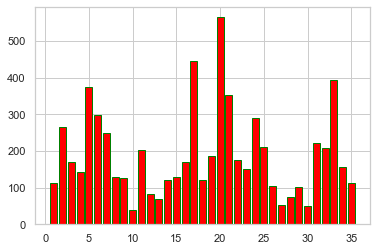

In [147]:
plt.bar('district','count', data=project_res_2018, color='red', edgecolor='green');

In [148]:
com_2018_council = commercial_permits_2018.groupby('council_district').count().reset_index()

In [149]:
com_2018_council

,council_district,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,mapped_location,month_entered,years_included
0,1.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1,2.0,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
2,3.0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
3,4.0,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
4,5.0,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
5,6.0,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
6,7.0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
7,8.0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
8,9.0,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
9,10.0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [150]:
project_com_2018 = com_2018_council.iloc[:,0:2]

In [151]:
project_com_2018.columns = ['district','count']

In [152]:
project_com_2018

,district,count
0,1.0,17
1,2.0,76
2,3.0,20
3,4.0,37
4,5.0,67
5,6.0,57
6,7.0,14
7,8.0,36
8,9.0,28
9,10.0,33


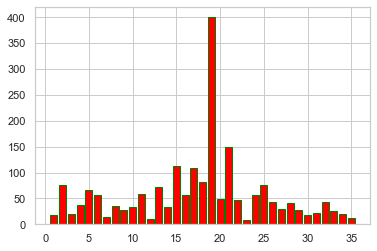

In [153]:
plt.bar('district','count', data=project_com_2018, color='red', edgecolor='green');

In [156]:
project_com_2018['permit_type'] = 'commercial'

In [157]:
project_res_2018['permit_type'] = 'residential'

In [162]:
concat_rescom_2018 = pd.concat([project_com_2018 , project_res_2018])

In [163]:
concat_rescom_2018

,district,count,permit_type
0,1.0,17,commercial
1,2.0,76,commercial
2,3.0,20,commercial
3,4.0,37,commercial
4,5.0,67,commercial
...,...,...,...
30,31.0,223,residential
31,32.0,207,residential
32,33.0,393,residential
33,34.0,155,residential


<Figure size 720x576 with 0 Axes>

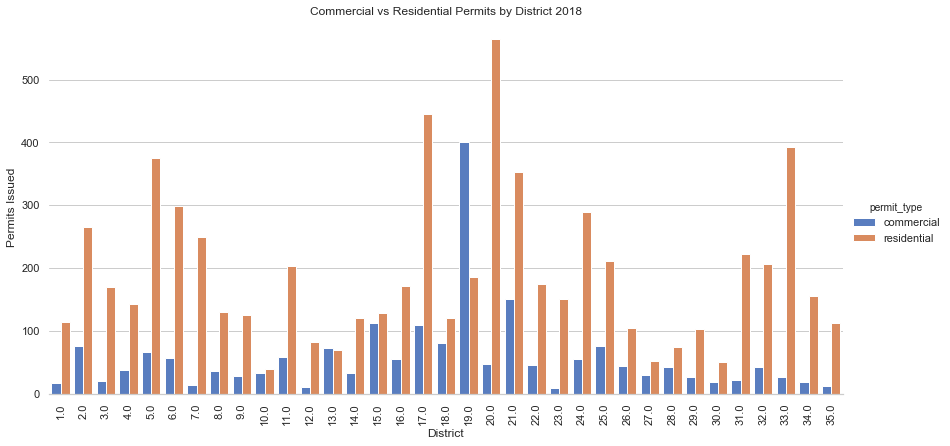

In [176]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")

# Draw a nested barplot 
barplot_permits_2019 = sns.catplot(x="district", y="count", hue="permit_type", data=concat_rescom_2018,
                height=6, aspect = 2, kind="bar", palette="muted")
barplot_permits_2019.despine(left=True)
barplot_permits_2019.set_ylabels("Permits Issued")

plt.title('Commercial vs Residential Permits by District 2018');
plt.xticks(rotation = 90);
plt.xlabel('District')
plt.ylabel('Permits Issued');